<a href="https://colab.research.google.com/github/GlebSimon/Gleb/blob/main/insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
plt.style.use('dark_background')
from tqdm import tqdm

## Read the dataset and display first five rows

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.0,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.0,...,0.0,0,0.00,0,0,5,35000,34,NaN,0


## Descriptive statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,23116.0,6.060602e+06,367848.038073,5498546.0,5739749.0,6020793.5,6.445488e+06,6697265.00
cred_sum_cc_all,23116.0,4.424794e+04,100601.596651,0.0,0.0,5000.0,4.972685e+04,5739786.09
mfo_inqs_count_month,23116.0,1.284262e+00,2.373415,0.0,0.0,0.0,2.000000e+00,25.00
all_closed_creds_sum_all,23116.0,1.653574e+05,478894.221794,0.0,3000.0,30834.5,1.357758e+05,30309967.00
bank_inqs_count_quarter,23116.0,3.760642e+00,5.057107,0.0,0.0,2.0,5.000000e+00,67.00
cred_max_overdue_max_ly,23116.0,4.070925e+03,26890.422460,0.0,0.0,0.0,3.000000e+03,1914581.16
all_active_creds_sum_all,23116.0,1.284212e+05,389071.817759,0.0,2000.0,15000.0,7.500000e+04,12000000.00
mfo_last_days_all,23116.0,2.615989e+03,4228.621029,0.0,13.0,83.5,2.070500e+03,9999.00
cred_sum_cc_ly,23116.0,1.067210e+04,37246.943546,0.0,0.0,0.0,0.000000e+00,878000.00
cred_sum_debt_all_all,23116.0,8.414683e+04,305472.366723,0.0,0.0,5000.0,3.496056e+04,11508246.66


In [ ]:
df.shape

(23116, 25)

In [ ]:
df.isna().mean().sort_values(ascending=False) # Nan для bad - это доля отказанных кредитов

bad                             0.685542
order_id                        0.000000
all_creds_count_all             0.000000
region                          0.000000
month_income                    0.000000
work_code                       0.000000
all_creds_count_lm              0.000000
count_overdue_all_3lm           0.000000
cred_sum_overdue_cc_all         0.000000
mfo_closed_count_ly             0.000000
cred_max_overdue_max_3lm        0.000000
cred_day_overdue_all_sum_all    0.000000
delay_more_sum_all              0.000000
cred_sum_cc_all                 0.000000
mfo_cred_mean_sum_3lm           0.000000
all_closed_creds_sum_ly         0.000000
cred_sum_debt_all_all           0.000000
cred_sum_cc_ly                  0.000000
mfo_last_days_all               0.000000
all_active_creds_sum_all        0.000000
cred_max_overdue_max_ly         0.000000
bank_inqs_count_quarter         0.000000
all_closed_creds_sum_all        0.000000
mfo_inqs_count_month            0.000000
approved        

## To see the datatypes of the column

In [ ]:
df.dtypes

order_id                          int64
cred_sum_cc_all                 float64
mfo_inqs_count_month              int64
all_closed_creds_sum_all          int64
bank_inqs_count_quarter           int64
cred_max_overdue_max_ly         float64
all_active_creds_sum_all          int64
mfo_last_days_all                 int64
cred_sum_cc_ly                  float64
cred_sum_debt_all_all           float64
all_closed_creds_sum_ly           int64
mfo_cred_mean_sum_3lm           float64
delay_more_sum_all                int64
all_creds_count_all               int64
cred_day_overdue_all_sum_all      int64
cred_max_overdue_max_3lm        float64
mfo_closed_count_ly               int64
cred_sum_overdue_cc_all         float64
count_overdue_all_3lm             int64
all_creds_count_lm                int64
work_code                         int64
month_income                      int64
region                            int64
bad                             float64
approved                          int64


## Exploratory Data Analysis

In [ ]:
df['approved'].value_counts(normalize=True)

0    0.685542
1    0.314458
Name: approved, dtype: float64

In [ ]:
df['approved'].value_counts()

0    15847
1     7269
Name: approved, dtype: int64

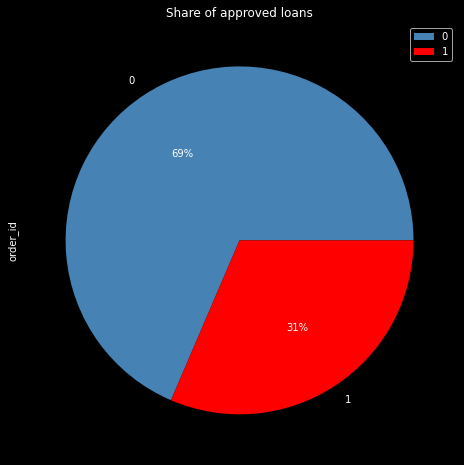

In [ ]:
df.groupby('approved',as_index=False).agg({'order_id':'count'})\
                                .plot(kind='pie',y='order_id',
                                      colors = ['steelblue','red'],
                                      autopct='%1.0f%%',title ='Share of approved loans',
                                      figsize=(10,8))

In [ ]:
df['bad'].value_counts(dropna=False,normalize=True)

NaN    0.685542
0.0    0.229538
1.0    0.084920
Name: bad, dtype: float64

In [ ]:
df['bad'].value_counts(normalize=True) #27 % допускают просрочку по одобренным кредитам

0.0    0.729949
1.0    0.270051
Name: bad, dtype: float64

In [ ]:
df['bad'].value_counts()

0.0    5306
1.0    1963
Name: bad, dtype: int64

In [ ]:
df['order_id'].count()

23116

In [ ]:
df['order_id'].nunique()

23116

# Heat map

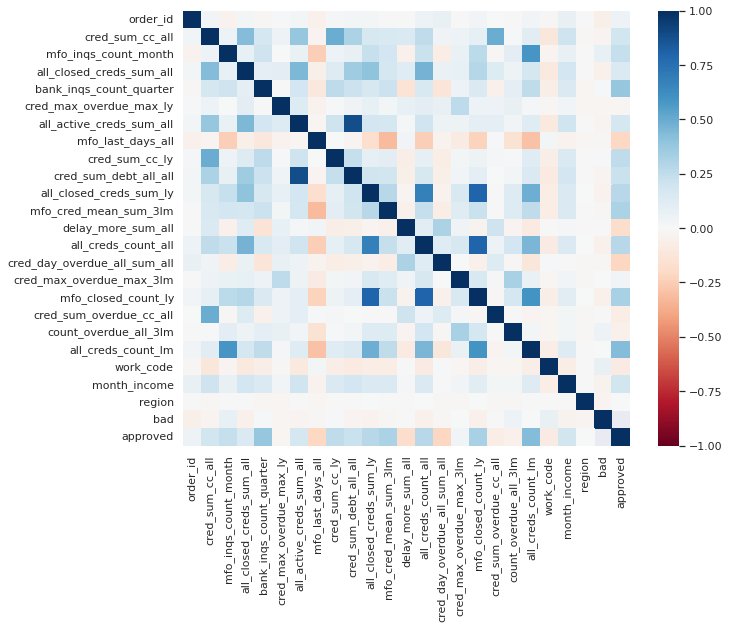

In [ ]:
# Посмотрим на heatmap для поиска корреляции между нашими признаками и таргетами
# Обратим внимание на коэффициенты, которые ближе всего к |1|,
# что будет свидетельствовать о наличии сильной взаимосвязи

sns.set(rc = {'figure.figsize':(10,8)})
dataplot=sns.heatmap(df.corr(),cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
plt.style.use('dark_background')

In [ ]:
df.groupby('approved').agg({'cred_sum_cc_all':'mean'})

,cred_sum_cc_all
approved,
0,31091.186909
1,72930.696846


In [ ]:
df['sum_cc_cut'] = pd.qcut(df['cred_sum_cc_all'],10,duplicates='drop')

In [ ]:
sum_cc_cut = df.groupby('sum_cc_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
sum_cc_cut # Cумма кредитов по кредитным картам положительно влияет на уровень одобрения

,sum_cc_cut,order_id,approved,bad
0,"(-0.001, 5000.0]",12041,0.208288,0.266746
1,"(5000.0, 15000.0]",1924,0.274948,0.277883
2,"(15000.0, 34786.26]",2216,0.328069,0.273728
3,"(34786.26, 65990.0]",2312,0.432958,0.287712
4,"(65990.0, 135000.0]",2344,0.524744,0.278862
5,"(135000.0, 5739786.09]",2279,0.559017,0.248823


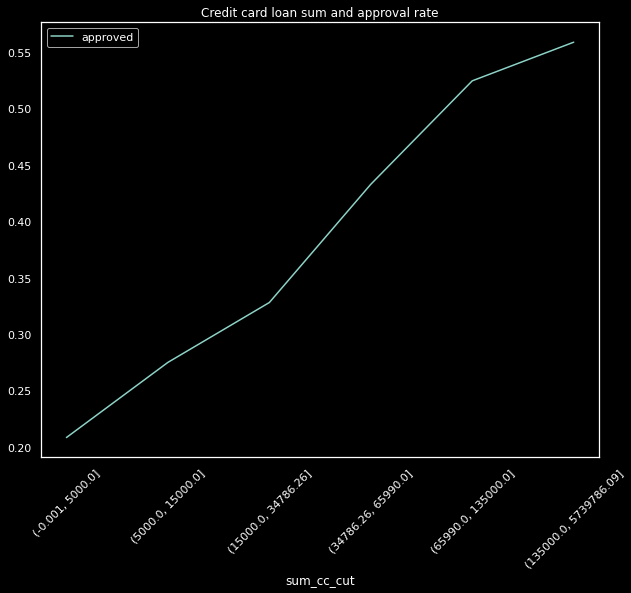

In [ ]:
sum_cc_cut.plot(x='sum_cc_cut',y='approved',grid=False,rot=45,
            title = 'Credit card loan sum and approval rate');

In [ ]:
df.groupby('approved').agg({'cred_sum_cc_ly':'mean'})

,cred_sum_cc_ly
approved,
0,4229.550854
1,24717.386837


In [ ]:
df[df['cred_sum_cc_ly']==0.1]['order_id'].count()

1040

In [ ]:
df['cc_limits_ly_cut'] = pd.qcut(df['cred_sum_cc_ly'],16,duplicates='drop')

In [ ]:
cc_limits_ly_cut = df.groupby('cc_limits_ly_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
cc_limits_ly_cut

,cc_limits_ly_cut,order_id,approved,bad
0,"(-0.001, 0.1]",18932,0.241760,0.262399
1,"(0.1, 15000.1]",1299,0.498075,0.279753
2,"(15000.1, 59931.25]",1440,0.665972,0.278415
3,"(59931.25, 878000.0]",1445,0.751557,0.289134


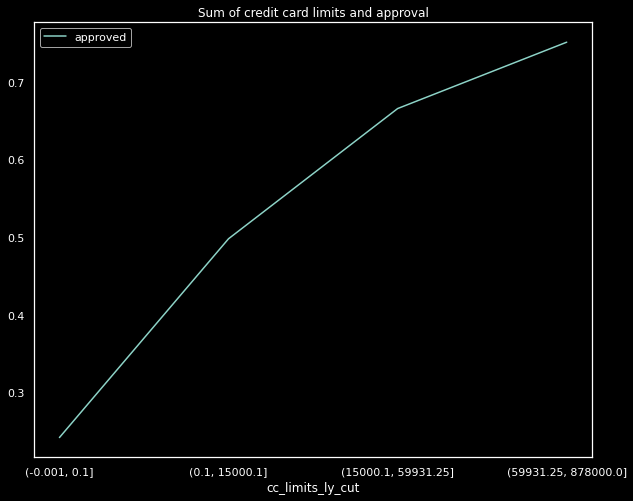

In [ ]:
cc_limits_ly_cut.plot(x='cc_limits_ly_cut',y='approved',grid=False,
                   title ='Sum of credit card limits and approval');

In [ ]:
df.groupby('approved').agg({'cred_sum_debt_all_all':'mean'})

,cred_sum_debt_all_all
approved,
0,37336.460635
1,186197.170845


In [ ]:
df['debts_sum_all_cut'] = pd.qcut(df['cred_sum_debt_all_all'],8,duplicates='drop')

In [ ]:
debts_sum_all_cut = df.groupby('debts_sum_all_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
debts_sum_all_cut # Сумма задолженности по все кредитам прямо пропорциональна уровню одобрения

,debts_sum_all_cut,order_id,approved,bad
0,"(-0.001, 5000.0]",11829,0.083524,0.261134
1,"(5000.0, 13492.59]",2618,0.337662,0.268100
2,"(13492.59, 34960.562]",2890,0.481315,0.276060
3,"(34960.562, 133273.011]",2889,0.663898,0.267466
4,"(133273.011, 11508246.66]",2890,0.722491,0.273467


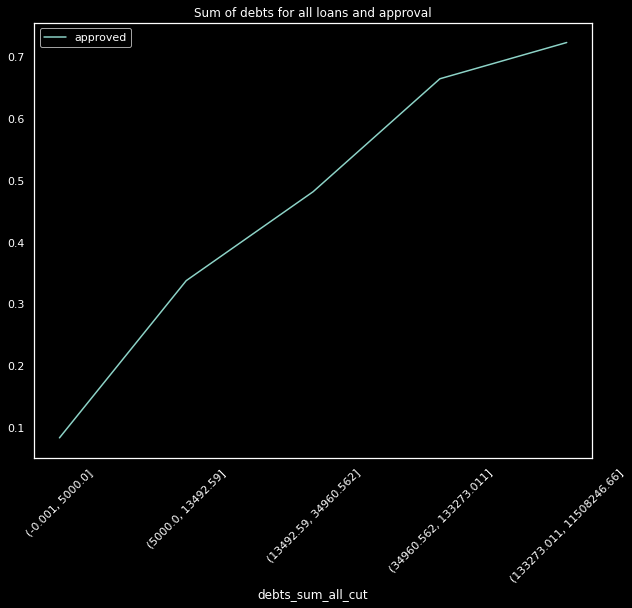

In [ ]:
debts_sum_all_cut.plot(x='debts_sum_all_cut',y='approved',grid=False,
             title='Sum of debts for all loans and approval',rot=45);

In [ ]:
df.groupby('work_code',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'}) # У госслужащих самая высокая вероятность одобрения кредита,
                                                                                 # тогда как у людей с рабочей профессией - самая низкая.
                                                                                 # Представители рабочих профессий вероятнее не вернут следующий кредит

,work_code,order_id,approved,bad
0,1,2084,0.417946,0.203215
1,2,4881,0.390289,0.260367
2,3,4834,0.227555,0.253636
3,4,3570,0.337255,0.251661
4,5,7747,0.282561,0.323435


In [ ]:
df['cred_debt_cut'] = pd.qcut(df['cred_sum_debt_all_all'],7,duplicates='drop')

In [ ]:
df.groupby('cred_debt_cut',as_index=False)[['approved','bad']].agg(['mean','count']) #Вероятность одобрения повышается с суммой задолженности по всем кредитам

approved             bad      
                               mean count      mean count
cred_debt_cut                                            
(-0.001, 1695.0]           0.064594  9908  0.253125   640
(1695.0, 9000.0]           0.235525  3316  0.275288   781
(9000.0, 25935.997]        0.425312  3287  0.274678  1398
(25935.997, 102849.137]    0.624470  3302  0.263337  2062
(102849.137, 11508246.66]  0.722979  3303  0.275963  2388

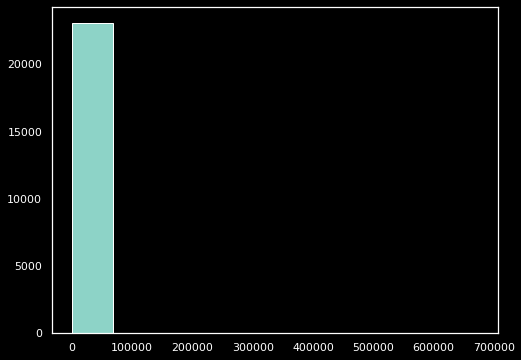

In [ ]:
df['cred_max_overdue_max_3lm'].hist(grid=False,figsize=(8,6)); # У большинства максимальная сумма просроченной задолженности по кредитам взятым за послед.3 мес. меньше 100000

In [ ]:
overdue_less_1000 = df[df['cred_max_overdue_max_3lm']<1000].copy()

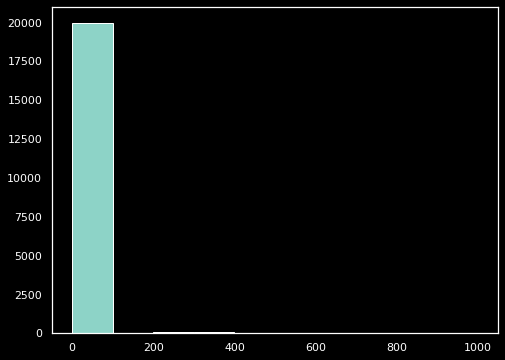

In [ ]:
overdue_less_1000['cred_max_overdue_max_3lm'].hist(grid=False,figsize=(8,6)); # У 86.3% нет такой просроченной задолженности в принципе

In [ ]:
df['cred_max_overdue_max_3lm'].value_counts(normalize=True).to_frame()

,cred_max_overdue_max_3lm
0.00,0.863082
5000.00,0.006965
4000.00,0.006705
10000.00,0.006056
3000.00,0.006013
...,...
827.77,0.000043
1783.74,0.000043
2768.30,0.000043
1819.21,0.000043


In [ ]:
df['cred_max_overdue_max_3lm'].agg(['min','mean','median','max']).to_frame()

,cred_max_overdue_max_3lm
min,0.000000
mean,1107.137568
median,0.000000
max,673495.420000


In [ ]:
without_cred_overdue = df[df['cred_max_overdue_max_3lm']==0].copy()

In [ ]:
without_cred_overdue.agg({'approved':'mean','bad':'mean'}).to_frame().rename(columns = {0:'average'}) #Но только 30 % одобряют кредит

,average
approved,0.305047
bad,0.257969


In [ ]:
df['bad'].value_counts()

0.0    5306
1.0    1963
Name: bad, dtype: int64

In [ ]:
# %%capture
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('/content/drive/MyDrive/insights.ipynb')

In [ ]:
df.groupby('work_code',as_index=False).agg({'order_id':'count','all_creds_count_all':'mean','delay_more_sum_all':'mean','approved':'mean'})# В среднем госслужащие имеют больше кредитов
                                                                                                                         # и количество просрочек выше 90 дней

,work_code,order_id,all_creds_count_all,delay_more_sum_all,approved
0,1,2084,15.538868,6.309501,0.417946
1,2,4881,14.140545,4.852079,0.390289
2,3,4834,8.108399,4.485519,0.227555
3,4,3570,12.821289,5.270588,0.337255
4,5,7747,9.970440,5.189364,0.282561


In [ ]:
df[df['all_creds_count_all']==546][['order_id','work_code','all_creds_count_all','approved']]

,order_id,work_code,all_creds_count_all,approved
21751,6635212,2,546,1


In [ ]:
df['all_creds_count_cut'] = pd.qcut(df['all_creds_count_all'],5)

In [ ]:
creds_count_cut = df.groupby('all_creds_count_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'}) #Количество кредитов положительно влияет на уровень одобрения 

In [ ]:
creds_count_cut

,all_creds_count_cut,order_id,approved,bad
0,"(-0.001, 2.0]",5619,0.054814,0.295455
1,"(2.0, 4.0]",3694,0.178397,0.268589
2,"(4.0, 8.0]",4746,0.313527,0.272177
3,"(8.0, 16.0]",4648,0.466222,0.291186
4,"(16.0, 546.0]",4409,0.600363,0.248961


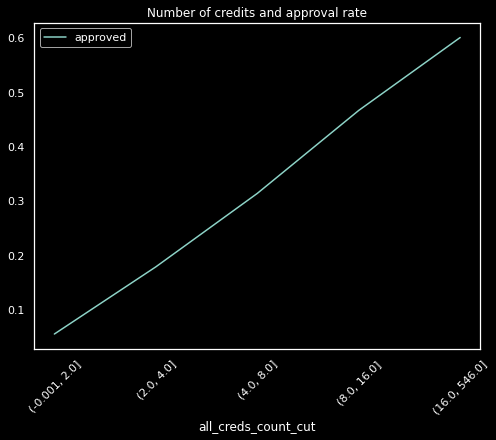

In [ ]:
creds_count_cut.plot(x='all_creds_count_cut',y='approved',rot=45,
                     title='Number of credits and approval rate',figsize=(8,6),grid=False);


In [ ]:
df['delay_more_sum_cut'] = pd.qcut(df['delay_more_sum_all'],8,duplicates='drop')

In [ ]:
df.groupby('delay_more_sum_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'}) #Количество просрочек более чем на 90 дней негативно влияет на уровень одобрения

,delay_more_sum_cut,order_id,approved,bad
0,"(-0.001, 1.0]",14719,0.404104,0.271184
1,"(1.0, 5.0]",3104,0.183956,0.248687
2,"(5.0, 13.0]",2547,0.161366,0.279805
3,"(13.0, 171.0]",2746,0.123452,0.274336


In [ ]:
df['delay_more_sum_all'].value_counts(normalize=True).to_frame() #Стоит обратить внимание, что у 56% нет просрочек более чем на 90 дней

,delay_more_sum_all
0,0.560218
1,0.076527
2,0.043649
3,0.032748
4,0.032185
...,...
141,0.000043
80,0.000043
130,0.000043
118,0.000043


In [ ]:
df['bad'].value_counts(dropna=False)

NaN    15847
0.0     5306
1.0     1963
Name: bad, dtype: int64

In [ ]:
df['month_income'].agg(['min','mean','median','max'])

min           0.000000
mean      39363.189998
median    35000.000000
max       65000.000000
Name: month_income, dtype: float64

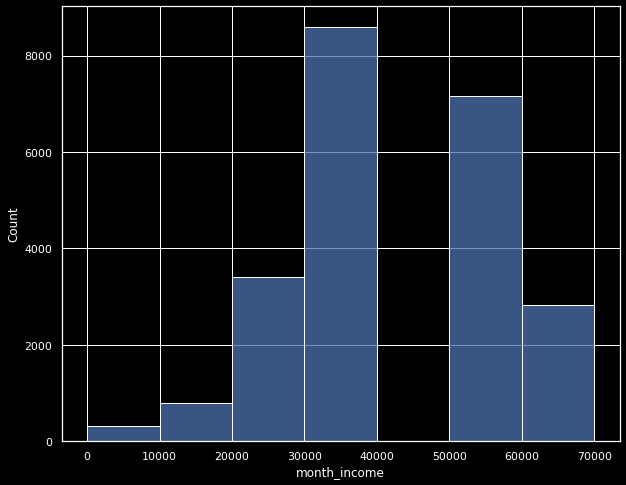

In [ ]:
sns.histplot(df['month_income'],bins=5,binwidth=10000)

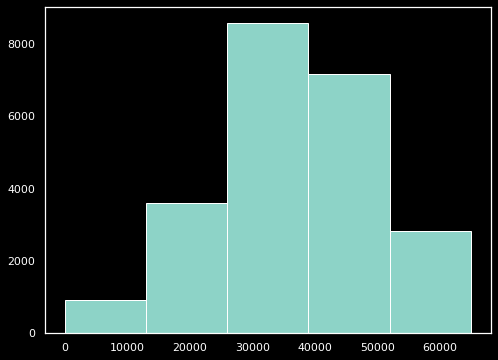

In [ ]:
df['month_income'].hist(figsize=(8,6),grid=False,bins=5); # Нехарактерное распределение для месячных доходов

In [ ]:
df['month_income_cut'] = pd.cut(df['month_income'],5,duplicates='drop',right=False)

In [ ]:
month_income_cut = df.groupby('month_income_cut',as_index=False)\
                     .agg({'order_id':'count','approved':'mean','bad':'mean'}) # Месячный доход оказывает положительное влияние на вероятность одобрения кредита,
                                                                               # но не оказывает никого вляиния на вероятность возврата кредита

In [ ]:
month_income_cut

,month_income_cut,order_id,approved,bad
0,"[0.0, 13000.0)",918,0.193900,0.247191
1,"[13000.0, 26000.0)",3604,0.178413,0.287714
2,"[26000.0, 39000.0)",8591,0.281690,0.286364
3,"[39000.0, 52000.0)",7169,0.362115,0.277735
4,"[52000.0, 65065.0)",2834,0.505293,0.223464


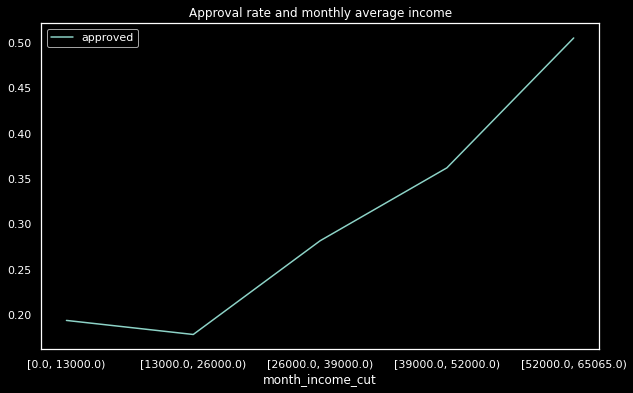

In [ ]:
month_income_cut.plot(x='month_income_cut',y='approved',kind='line',
       title ='Approval rate and monthly average income',figsize=(10,6),grid=False);

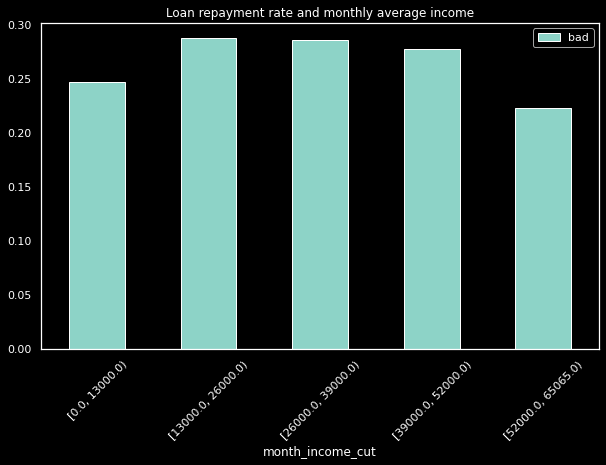

In [ ]:
month_income_cut.plot(x='month_income_cut',y='bad',rot=45,kind='bar',
       title ='Loan repayment rate and monthly average income',figsize=(10,6),grid=False)

In [ ]:
jobs = df.groupby('work_code').agg({'order_id':'count','month_income':'mean'})

In [ ]:
jobs

,order_id,month_income
work_code,,
1,2084,46002.879079
2,4881,43215.632043
3,4834,30008.274721
4,3570,42068.067227
5,7747,39740.673809


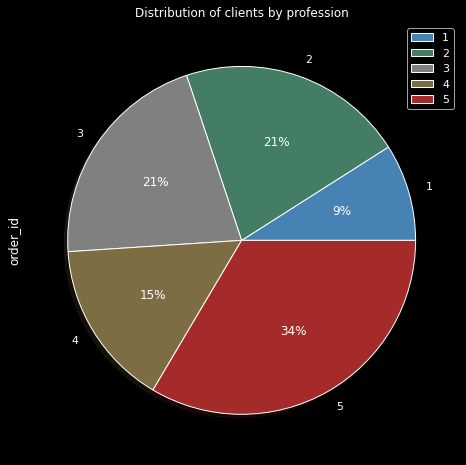

In [ ]:
jobs.plot(y='order_id',kind='pie',autopct='%1.0f%%',                               #Больше всего клиентов рабочих профессий, госслужащих - 9%    
       figsize=(10,8),shadow=True,
       colors = ['steelblue','#427d64','grey','#7d6d42','brown'],
       title='Distribution of clients by profession');


In [ ]:
df[df['month_income']==0]['work_code'].value_counts().to_frame() # некоторые офисные работники не имеют месячного дохода

,work_code
3,320


In [ ]:
df[df['month_income']==0].groupby('approved').agg({'order_id':'count'})

,order_id
approved,
0,244
1,76


In [ ]:
df[df['month_income']==0].groupby(['approved']).agg({'order_id':'count'})

,order_id
approved,
0,244
1,76


In [ ]:
df[df['month_income']==0].groupby('bad').agg({'order_id':'count'})

,order_id
bad,
0.0,59
1.0,17


In [ ]:
df.groupby('approved',as_index=False).agg({'month_income':'median'})

,approved,month_income
0,0,35000.0
1,1,50000.0


In [ ]:
cred_overdue_all = df.groupby('approved',as_index=False).agg({'cred_sum_overdue_cc_all':'mean'}) # Средняя сумма просрочек по кред.картам выше у тех, кому отказали в кредите

In [ ]:
cred_overdue_all

,approved,cred_sum_overdue_cc_all
0,0,6786.754930
1,1,717.309495


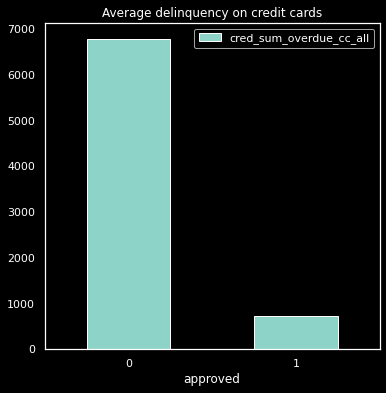

In [ ]:
cred_overdue_all.plot(kind='bar',x='approved',y='cred_sum_overdue_cc_all',
title='Average delinquency on credit cards',figsize=(6,6),grid=False,rot=0);

In [ ]:
df.groupby('count_overdue_all_3lm',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'}) # Доля одбренных заявок снижается с ростом количества кредитов на просрочке, взятых за последние 3 мес.

,count_overdue_all_3lm,order_id,approved,bad
0,0,21068,0.323144,0.261310
1,1,1625,0.227077,0.411924
2,2,297,0.222222,0.348485
3,3,67,0.194030,0.230769
4,4,29,0.310345,0.444444
5,5,9,0.222222,0.500000
6,6,6,0.000000,NaN
7,7,5,0.000000,NaN
8,8,3,0.000000,NaN
9,9,5,0.400000,0.500000


In [ ]:
df['count_overdue_all_3lm'].value_counts(normalize=True).to_frame() # 91% клиентов без кредитов на просрочке,взятых за последние 3 мес

,count_overdue_all_3lm
0,0.911403
1,0.070298
2,0.012848
3,0.002898
4,0.001255
5,0.000389
6,0.000260
7,0.000216
9,0.000216
8,0.000130


In [ ]:
df['all_creds_count_lm'].value_counts(normalize=True).to_frame().head(10) # Порядка 98% клиентов взяли меньше 7 кредитов за последний месяц. У 77% клиентов меньше двух кредитов

,all_creds_count_lm
0,0.581589
1,0.190042
2,0.092663
3,0.048451
4,0.030066
5,0.019337
6,0.010253
7,0.007441
8,0.005797
9,0.003201


In [ ]:
df['mfo_closed_count_ly'].value_counts(normalize=True).to_frame() # 55% клиентов не закрыли ни одниго кредита МФО, взятых за последний год

,mfo_closed_count_ly
0,0.550398
1,0.104906
2,0.061992
3,0.045510
4,0.032488
...,...
69,0.000043
91,0.000043
100,0.000043
76,0.000043


In [ ]:
df.groupby('approved').agg({'mfo_closed_count_ly':'mean'})

,mfo_closed_count_ly
approved,
0,1.45649
1,7.87261


In [ ]:
df['mfo_closed_ly_cut'] = pd.qcut(df['mfo_closed_count_ly'],12,duplicates='drop')

In [ ]:
mfo_closed_ly_cut = df.groupby('mfo_closed_ly_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
mfo_closed_ly_cut # Доля одобрений растет по мере увеличения количества закрытых МФО кредитов, взятых за последний год

,mfo_closed_ly_cut,order_id,approved,bad
0,"(-0.001, 1.0]",15148,0.165764,0.291916
1,"(1.0, 2.0]",1433,0.389393,0.292115
2,"(2.0, 3.0]",1052,0.483840,0.263261
3,"(3.0, 6.0]",1925,0.581818,0.271429
4,"(6.0, 12.0]",1786,0.665733,0.253995
5,"(12.0, 344.0]",1772,0.779910,0.236614


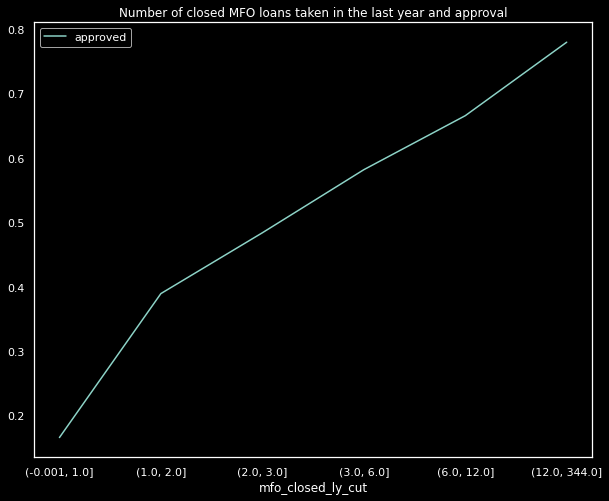

In [ ]:
mfo_closed_ly_cut.plot(x='mfo_closed_ly_cut',y='approved',grid=False,
title='Number of closed MFO loans taken in the last year and approval');

In [ ]:
df['mfo_inqs_count_month'].value_counts(normalize=True).to_frame().head(10) # У 56% не было запросов на кредиты в другие МФО

,mfo_inqs_count_month
0,0.566145
1,0.168628
2,0.091279
3,0.057795
4,0.035257
5,0.025696
6,0.015357
7,0.010166
8,0.008090
9,0.005710


In [ ]:
df.groupby('approved').agg({'order_id':'count','mfo_inqs_count_month':'mean'}) # Количество обращений в другие МФО выше у одобренных

,order_id,mfo_inqs_count_month
approved,,
0,15847,0.898403
1,7269,2.125464


In [ ]:
df['mfo_inqs_cut'] = pd.qcut(df['mfo_inqs_count_month'],12,duplicates='drop')

In [ ]:
mfo_inqs_cut = df.groupby('mfo_inqs_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'}) 

In [ ]:
mfo_inqs_cut # Количество обращений положительно влияет на уровень одобрения и вероятность просрочки

,mfo_inqs_cut,order_id,approved,bad
0,"(-0.001, 1.0]",16985,0.244098,0.250603
1,"(1.0, 2.0]",2110,0.463981,0.245148
2,"(2.0, 3.0]",1336,0.487275,0.294931
3,"(3.0, 4.0]",815,0.501840,0.286064
4,"(4.0, 25.0]",1870,0.579679,0.345941


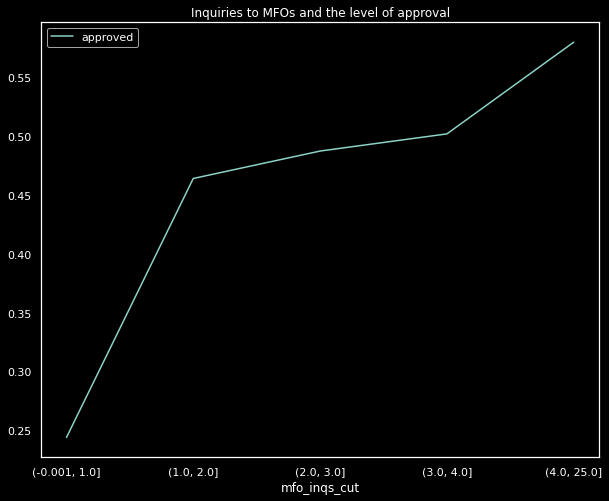

In [ ]:
mfo_inqs_cut.plot(x='mfo_inqs_cut',y='approved',grid=False,
                  title='Inquiries to MFOs and the level of approval');

In [ ]:
df['bank_inqs_count_quarter'].value_counts().head(6).to_frame() # 76% клиентов обращались меньше 6 раз на кредиты в банки 

,bank_inqs_count_quarter
0,6586
1,3473
2,2736
3,2083
4,1574
5,1221


In [ ]:
df.groupby('approved').agg({'order_id':'count','bank_inqs_count_quarter':'mean'}) # Одобренные чаще обращались на кредиты в банки

,order_id,bank_inqs_count_quarter
approved,,
0,15847,2.447908
1,7269,6.622507


In [ ]:
df['inqs_bank_cut'] = pd.qcut(df['bank_inqs_count_quarter'],10,duplicates='drop')

In [ ]:
inqs_bank_cut = df.groupby('inqs_bank_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
inqs_bank_cut

,inqs_bank_cut,order_id,approved,bad
0,"(-0.001, 1.0]",10059,0.135103,0.273731
1,"(1.0, 2.0]",2736,0.260599,0.265077
2,"(2.0, 3.0]",2083,0.330293,0.261628
3,"(3.0, 4.0]",1574,0.392630,0.244337
4,"(4.0, 6.0]",2208,0.479620,0.274788
5,"(6.0, 10.0]",2373,0.573957,0.274596
6,"(10.0, 67.0]",2083,0.705713,0.276190


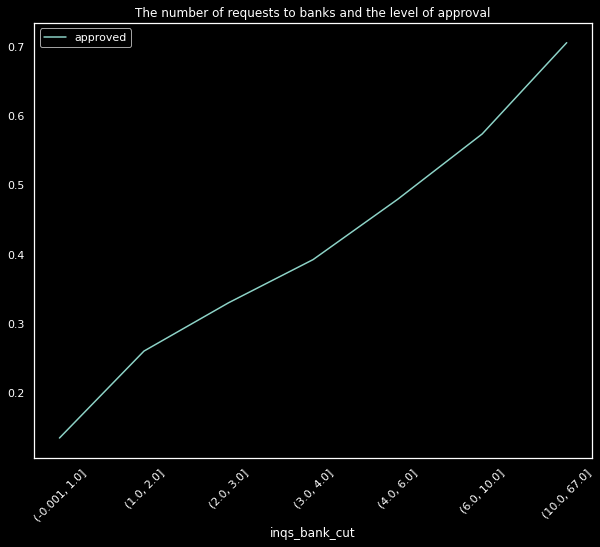

In [ ]:
inqs_bank_cut.plot(x='inqs_bank_cut',y='approved',rot=45,grid=False,
title='The number of requests to banks and the level of approval');

In [ ]:
df['cred_max_overdue_max_ly'].value_counts(normalize=True).to_frame().head(10) #  2/3 клиентов не допускали просрочки за год 

,cred_max_overdue_max_ly
0.0,0.652102
5000.0,0.014492
3000.0,0.013367
10000.0,0.012026
4000.0,0.011161
6000.0,0.009907
7000.0,0.009041
15000.0,0.008219
2000.0,0.007960
8000.0,0.006273


In [ ]:
df.groupby('approved').agg({'order_id':'count','mfo_cred_mean_sum_3lm':'mean'}) # У тех, кому одобрили кредит средняя сумма МФО кредитов за последие 3 мес существенно выше

,order_id,mfo_cred_mean_sum_3lm
approved,,
0,15847,2472.183661
1,7269,8057.624316


In [ ]:
df['mfo_cred_mean_sum_3lm'].value_counts(normalize=True).to_frame().head(10)

,mfo_cred_mean_sum_3lm
0.0,0.493035
3000.0,0.021197
4000.0,0.018256
2000.0,0.018212
5000.0,0.016828
1483.0,0.016223
6000.0,0.010512
1000.0,0.008522
7000.0,0.007960
10000.0,0.006576


In [ ]:
df['mfo_creds_sum_cut'] = pd.qcut(df['mfo_cred_mean_sum_3lm'],10,duplicates='drop')

In [ ]:
mfo_creds_sum_cut = df.groupby('mfo_creds_sum_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
mfo_creds_sum_cut # Уровень одобрения напрямую связан с суммой закрытых за последние 3 мес МФО кредитов 

,mfo_creds_sum_cut,order_id,approved,bad
0,"(-0.001, 1000.0]",11606,0.123729,0.254178
1,"(1000.0, 3333.333]",2282,0.228309,0.257198
2,"(3333.333, 5208.302]",2293,0.416049,0.288260
3,"(5208.302, 7500.0]",2313,0.559447,0.275116
4,"(7500.0, 11288.767]",2310,0.648918,0.272181
5,"(11288.767, 315200.0]",2312,0.676903,0.271565


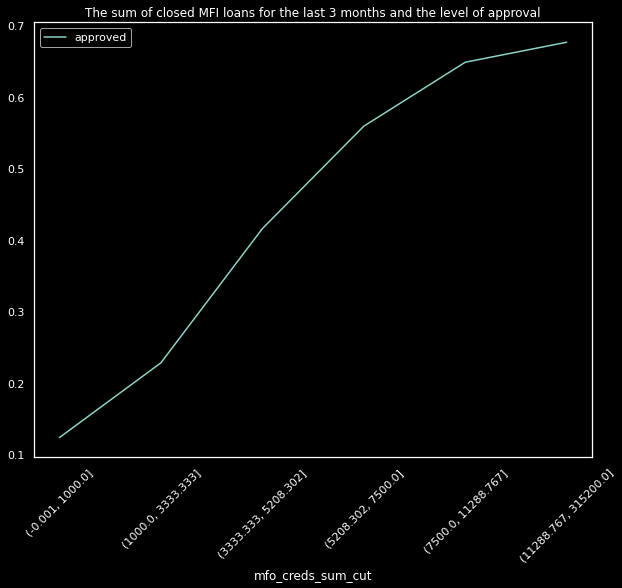

In [ ]:
mfo_creds_sum_cut.plot(x='mfo_creds_sum_cut',y='approved',grid=False,rot=45,
title='The sum of closed MFI loans for the last 3 months and the level of approval');

In [ ]:
df['mfo_last_days_all'].value_counts(normalize=True).to_frame().head(10) # Четверть вклиентов,судя по всему, никогда не обращались в МФО

,mfo_last_days_all
9999,0.245761
5,0.025956
7,0.024442
4,0.024355
6,0.023231
8,0.022885
2,0.021111
9,0.019813
3,0.019597
10,0.018342


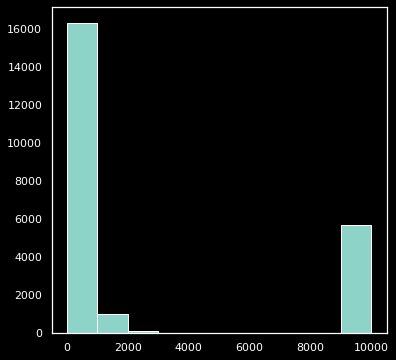

In [ ]:
df['mfo_last_days_all'].hist(grid=False,figsize=(6,6));

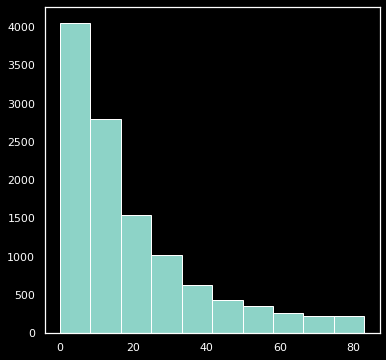

In [ ]:
df[df['mfo_last_days_all']<83.5]['mfo_last_days_all'].hist(grid=False,figsize=(6,6));

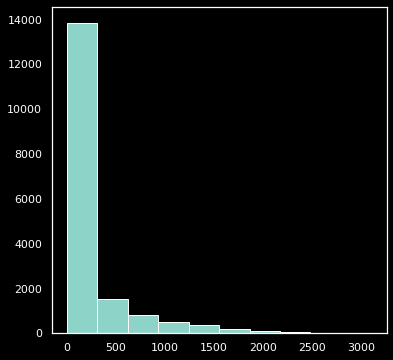

In [ ]:
df[df['mfo_last_days_all']< 9999]['mfo_last_days_all'].hist(grid=False,figsize=(6,6));

In [ ]:
df.groupby('approved').agg({'order_id':'count','mfo_last_days_all':'median'}) # Среди одобренных количество дней прошедших с последнего займа в МФО меньше

,order_id,mfo_last_days_all
approved,,
0,15847,342.0
1,7269,14.0


In [ ]:
df['mfo_last_days_cut'] = pd.qcut(df['mfo_last_days_all'],7,duplicates='drop')

In [ ]:
mfo_last_days_cut = df.groupby('mfo_last_days_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
mfo_last_days_cut # В целом чем больше времени прошло с последнего займа в МФО, тем ниже уровень одобрения

,mfo_last_days_cut,order_id,approved,bad
0,"(-0.001, 7.0]",3527,0.597675,0.265180
1,"(7.0, 16.0]",3326,0.582081,0.281508
2,"(16.0, 39.0]",3061,0.426331,0.290421
3,"(39.0, 217.0]",3296,0.214199,0.237960
4,"(217.0, 1108.714]",3301,0.068464,0.269912
5,"(1108.714, 9999.0]",6605,0.149584,0.254049


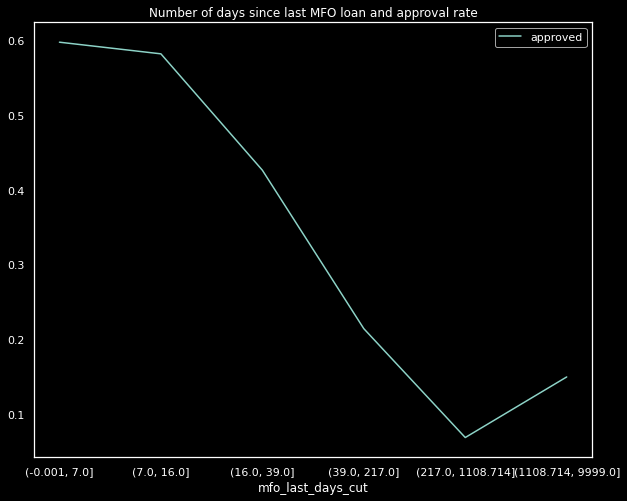

In [ ]:
mfo_last_days_cut.plot(x='mfo_last_days_cut',y='approved',grid=False,
                       title='Number of days since last MFO loan and approval rate');

In [ ]:
df['all_closed_creds_sum_ly'].value_counts(normalize=True).to_frame().head(10)

,all_closed_creds_sum_ly
0,0.527643
2000,0.016266
3000,0.013713
4000,0.013238
5000,0.011940
6000,0.011118
10000,0.007830
1483,0.007484
7000,0.007138
1000,0.006792


In [ ]:
df.groupby('approved').agg({'all_closed_creds_sum_ly':'mean'}) # Вероятность одобрения повышается с суммой закрытых кредитов за последний год

,all_closed_creds_sum_ly
approved,
0,10767.843819
1,72148.613014


In [ ]:
df['closed_creds_ly_cut'] = pd.qcut(df['all_closed_creds_sum_ly'],10,duplicates='drop')

In [ ]:
closed_creds_ly_cut = df.groupby('closed_creds_ly_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
closed_creds_ly_cut # Вероятность одобрения выше на 63% с увеличением суммы закрытых кредитов на 73310 руб

,closed_creds_ly_cut,order_id,approved,bad
0,"(-0.001, 4000.0]",13892,0.138929,0.302073
1,"(4000.0, 12500.0]",2302,0.364031,0.285203
2,"(12500.0, 31000.0]",2311,0.537862,0.276750
3,"(31000.0, 77310.5]",2299,0.642453,0.265403
4,"(77310.5, 4929320.0]",2312,0.770329,0.227400


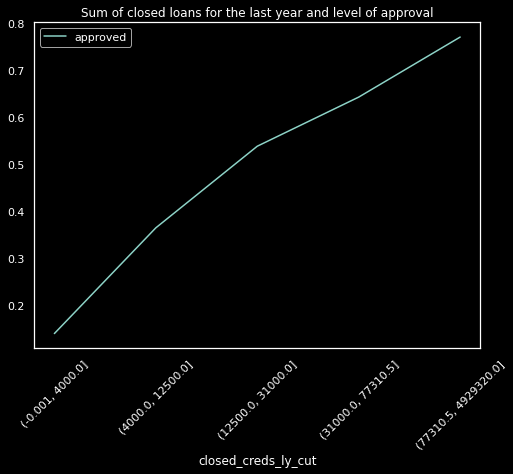

In [ ]:
closed_creds_ly_cut.plot(x='closed_creds_ly_cut',y='approved',rot=45,
grid=False,title='Sum of closed loans for the last year and level of approval',figsize=(8,6)); 

In [ ]:
df['all_creds_count_all'].agg(['min','mean','median','max']).to_frame()

,all_creds_count_all
min,0.000000
mean,11.403876
median,6.000000
max,546.000000


In [ ]:
df[df['all_creds_count_all']>100]['order_id'].count() # У 134-х клиентов общее количество кредитов превышает 100

134

In [ ]:
df['cred_sum_debt_all_all'].value_counts(normalize=True).to_frame() # 39,7% клиентов не имеют задолженности по кредитам

,cred_sum_debt_all_all
0.00,0.396565
3000.00,0.015876
5000.00,0.013930
2000.00,0.012892
4000.00,0.011940
...,...
9805.40,0.000043
465.20,0.000043
2588.50,0.000043
59444.02,0.000043


In [ ]:
df.groupby('work_code',as_index=False).agg({'order_id':'count','month_income':'mean', #Средняя задолженность у госслужащих выше (что объясняется суммой активных кредитов), 
                             'cred_sum_debt_all_all':'mean',                                                                      # как и вероятность одобрения
                             'all_active_creds_sum_all':'mean',
                              'all_closed_creds_sum_all':'mean','approved':'mean'})\
.rename(columns={'order_id':'count_order_id',
                 'cred_sum_debt_all_all':'creds_bebt',
                 'all_active_creds_sum_all':'active_creds_sum',
                 'all_closed_creds_sum_all':'closed_creds_sum'}).round(3)

,work_code,count_order_id,month_income,creds_bebt,active_creds_sum,closed_creds_sum,approved
0,1,2084,46002.879,184467.064,263096.699,320263.894,0.418
1,2,4881,43215.632,107541.923,161542.209,215165.871,0.390
2,3,4834,30008.275,44036.939,75914.937,105050.301,0.228
3,4,3570,42068.067,99852.554,150558.581,185653.614,0.337
4,5,7747,39740.674,60210.205,93886.261,120582.104,0.283


In [ ]:
df.groupby('approved').agg({'cred_sum_debt_all_all':'mean'}) #У одобренных клиентов средняя сумма задолженности выше

,cred_sum_debt_all_all
approved,
0,37336.460635
1,186197.170845


In [ ]:
df.groupby('approved').agg({'cred_day_overdue_all_sum_all':'mean','bad':'mean'}) #Среднее суммарное количество дней просрочки текущих активных кредитов меньше у тех, кому  одобрили кредит

,cred_day_overdue_all_sum_all,bad
approved,,
0,369.257336,NaN
1,18.967121,0.270051


In [ ]:
df['cred_day_overdue_cut'] = pd.qcut(df['cred_day_overdue_all_sum_all'],12,duplicates='drop')

In [ ]:
cred_day_overdue_cut = df.groupby('cred_day_overdue_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'}) #Доля одобрения меньше 5% в случаях, когда количество дней просрочки было больше 70

In [ ]:
cred_day_overdue_cut

,cred_day_overdue_cut,order_id,approved,bad
0,"(-0.001, 9.0]",15473,0.425257,0.265046
1,"(9.0, 70.0]",1878,0.270501,0.340551
2,"(70.0, 302.0]",1914,0.048589,0.268817
3,"(302.0, 1014.75]",1924,0.025988,0.240000
4,"(1014.75, 15327.0]",1927,0.019720,0.236842


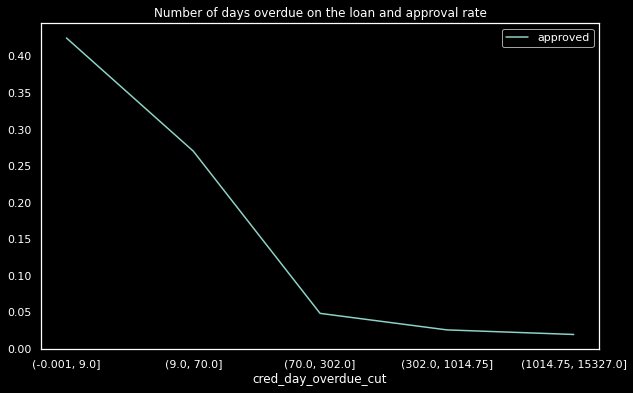

In [ ]:
cred_day_overdue_cut.plot(x='cred_day_overdue_cut',y='approved',kind='line',figsize=(10,6),
       title='Number of days overdue on the loan and approval rate',grid=False);

In [ ]:
df['cred_day_overdue_all_sum_all'].value_counts(normalize=True).to_frame() # У 65% клиентов суммарное количество дней просрочки текущих активных кредитов равно нулю

,cred_day_overdue_all_sum_all
0,0.650891
14,0.002985
7,0.002942
8,0.002942
9,0.002855
...,...
1454,0.000043
1670,0.000043
3645,0.000043
4646,0.000043


In [ ]:
df['all_creds_count_all'].describe()

count    23116.000000
mean        11.403876
std         18.543562
min          0.000000
25%          3.000000
50%          6.000000
75%         13.000000
max        546.000000
Name: all_creds_count_all, dtype: float64

In [ ]:
df.groupby('approved').agg({'all_creds_count_all':'mean'})

,all_creds_count_all
approved,
0,7.887171
1,19.070574


In [ ]:
df['all_creds_cut'] = pd.qcut(df['all_creds_count_all'],5,duplicates='drop')

In [ ]:
credits = df.groupby(['all_creds_cut'],as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
credits #Видна прямая взаимосвязь между общим количеством кредитов и долей одобрения

,all_creds_cut,order_id,approved,bad
0,"(-0.001, 2.0]",5619,0.054814,0.295455
1,"(2.0, 4.0]",3694,0.178397,0.268589
2,"(4.0, 8.0]",4746,0.313527,0.272177
3,"(8.0, 16.0]",4648,0.466222,0.291186
4,"(16.0, 546.0]",4409,0.600363,0.248961


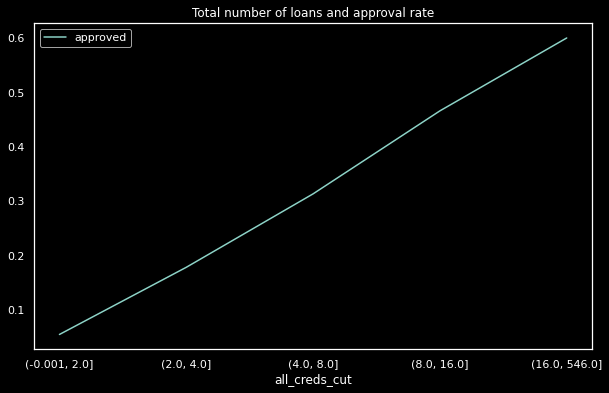

In [ ]:
credits.plot(x='all_creds_cut',y='approved',figsize=(10,6),
             title='Total number of loans and approval rate',grid=False);

In [ ]:
df.groupby('bad').agg({'all_creds_cut':'count'}) #Общее количество кредитов меньше у тех, кто допустил просрочку

,all_creds_cut
bad,
0.0,5306
1.0,1963


In [ ]:
df.groupby('all_creds_cut').agg({'bad':'mean'}) # По количеству общих кредитов нельзя сделать однозначный вывод о доли просроченных кредитов

,bad
all_creds_cut,
"(-0.001, 2.0]",0.295455
"(2.0, 4.0]",0.268589
"(4.0, 8.0]",0.272177
"(8.0, 16.0]",0.291186
"(16.0, 546.0]",0.248961


In [ ]:
df.groupby('approved').agg({'all_creds_count_lm':'mean'}) # Количество кредитов,взятых за последний месяц положительно влияют на одобрение

,all_creds_count_lm
approved,
0,0.454786
1,2.445041


In [ ]:
df['creds_count_lm_cut'] = pd.qcut(df['all_creds_count_lm'],16,duplicates='drop')

In [ ]:
creds_count_lm_cut = df.groupby('creds_count_lm_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'})

In [ ]:
creds_count_lm_cut # Approved стремительно растет с увеличением взятых кредитов за последний месяц
                  # С 90 % вероятностью одбрение происходит при наличии 4-х, взятых за последний месяц, кредитов

,creds_count_lm_cut,order_id,approved,bad
0,"(-0.001, 1.0]",17837,0.199249,0.263084
1,"(1.0, 2.0]",2142,0.552754,0.278716
2,"(2.0, 3.0]",1120,0.698214,0.271100
3,"(3.0, 4.0]",695,0.804317,0.270125
4,"(4.0, 48.0]",1322,0.900151,0.281513


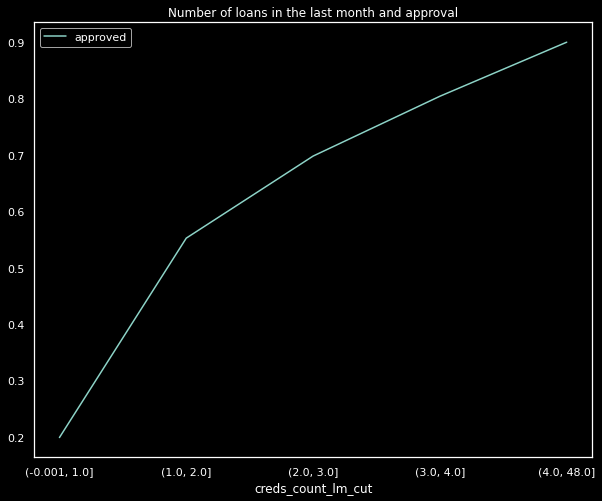

In [ ]:
creds_count_lm_cut.plot(x='creds_count_lm_cut',y='approved',grid=False,
                        title='Number of loans in the last month and approval');

In [ ]:
df.groupby('region').agg({'all_creds_count_all':'sum','approved':'mean','bad':'mean'})\
.sort_values('all_creds_count_all',ascending=False) # 45-й регион самый закредитованный регион, исходя из общего количества кредитов

,all_creds_count_all,approved,bad
region,,,
45,17053,0.388341,0.200924
46,13761,0.365720,0.205514
80,9884,0.314070,0.308000
65,9550,0.304455,0.284553
3,9083,0.331823,0.269625
...,...,...,...
62,79,0.285714,0.000000
59,34,0.000000,NaN
43,32,0.000000,NaN


In [ ]:
df.groupby('region').agg({'all_creds_count_all':'count','approved':'mean'}).sort_values('approved',ascending=False) # В 55-м регионе чаще всего одобряют кредит

,all_creds_count_all,approved
region,,
55,9,0.555556
44,32,0.468750
66,182,0.406593
40,547,0.402194
45,1115,0.388341
...,...,...
95,76,0.197368
93,118,0.186441
59,2,0.000000


In [ ]:
df['cred_sum_debt_all_all'].value_counts()

0.00         9167
3000.00       367
5000.00       322
2000.00       298
4000.00       276
             ... 
9805.40         1
465.20          1
2588.50         1
59444.02        1
574940.66       1
Name: cred_sum_debt_all_all, Length: 9669, dtype: int64

In [ ]:
df.groupby('approved').agg({'all_active_creds_sum_all':'mean'}) # Положительно на вероятность ообрения влияет денежная сумма всех активных кредитов

,all_active_creds_sum_all
approved,
0,82021.472266
1,229576.362086


In [ ]:
df['active_credsum_cut'] = pd.qcut(df['all_active_creds_sum_all'],10,duplicates='drop')

In [ ]:
active_credsum_cut = df.groupby('active_credsum_cut',as_index=False).agg({'order_id':'count','approved':'mean','bad':'mean'}) # Вероятность одобрения растет с увеличением денежной суммы всех активных кредитов

In [ ]:
active_credsum_cut

,active_credsum_cut,order_id,approved,bad
0,"(-0.001, 4000.0]",7285,0.108717,0.248737
1,"(4000.0, 8000.0]",2106,0.178538,0.295213
2,"(8000.0, 15000.0]",2225,0.251685,0.282143
3,"(15000.0, 27891.0]",2254,0.357587,0.276675
4,"(27891.0, 52337.0]",2311,0.415837,0.262227
5,"(52337.0, 115001.0]",2312,0.495675,0.265271
6,"(115001.0, 328893.0]",2311,0.547815,0.289889
7,"(328893.0, 12000000.0]",2312,0.589100,0.257709


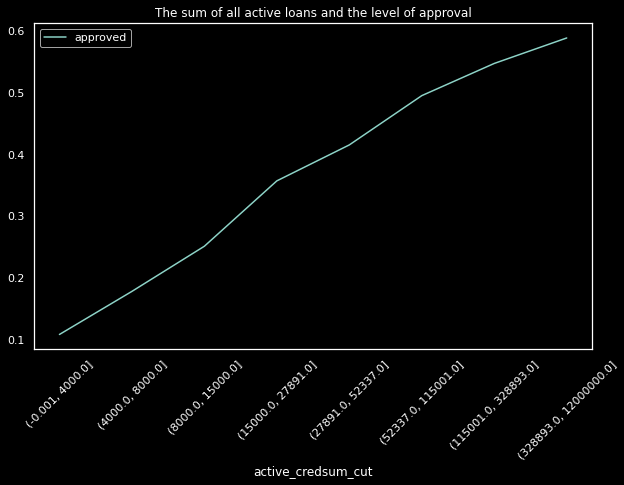

In [ ]:
active_credsum_cut.plot(x='active_credsum_cut',y='approved',figsize=(10,6),kind='line',
       title = 'The sum of all active loans and the level of approval',grid=False,rot=45);

In [ ]:
cred_sum_debt_all_cut = df.groupby('month_income_cut',as_index=False).agg({'order_id':'count','cred_sum_debt_all_all':'median'}) #Месячный доход прямо пропорционален усредненной сумме задолженности по всем кредитам...

In [ ]:
cred_sum_debt_all_cut

,month_income_cut,order_id,cred_sum_debt_all_all
0,"[0.0, 13000.0)",918,1483.00
1,"[13000.0, 26000.0)",3604,1000.00
2,"[26000.0, 39000.0)",8591,4000.00
3,"[39000.0, 52000.0)",7169,7063.91
4,"[52000.0, 65065.0)",2834,28500.00


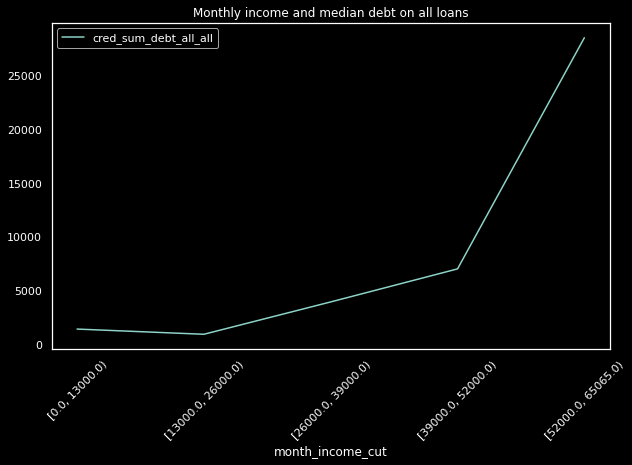

In [ ]:
cred_sum_debt_all_cut.plot(x='month_income_cut',y='cred_sum_debt_all_all',figsize=(10,6),
       title='Monthly income and median debt on all loans',kind='line',rot=45,grid=False);

In [ ]:
mfo_avgcred_sum_cut = df.groupby('month_income_cut',as_index=False).agg({'order_id':'count','mfo_cred_mean_sum_3lm':'mean'})# ...средней сумме МФО кредитов, выданных за последние 3 месяца...

In [ ]:
mfo_avgcred_sum_cut

,month_income_cut,order_id,mfo_cred_mean_sum_3lm
0,"[0.0, 13000.0)",918,2775.099075
1,"[13000.0, 26000.0)",3604,2564.942538
2,"[26000.0, 39000.0)",8591,3674.442469
3,"[39000.0, 52000.0)",7169,4731.817292
4,"[52000.0, 65065.0)",2834,7221.749595


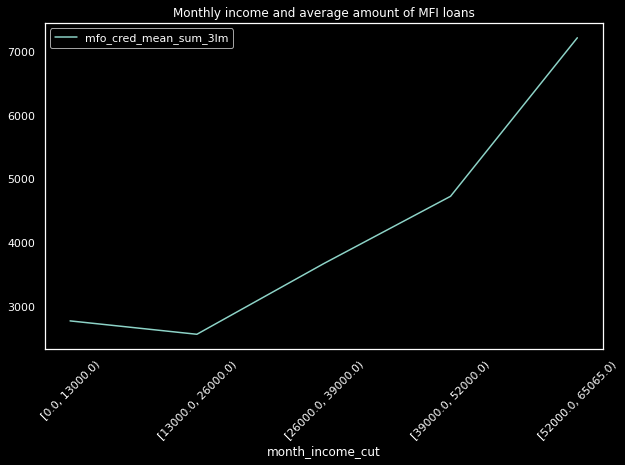

In [ ]:
mfo_avgcred_sum_cut.plot(x='month_income_cut',y='mfo_cred_mean_sum_3lm',figsize=(10,6),
       title='Monthly income and average amount of MFI loans',kind='line',rot=45,grid=False);

In [ ]:
all_active_creds_sum_cut = df.groupby('month_income_cut',as_index=False).agg({'order_id':'count','all_active_creds_sum_all':'median'})#...и денежной сумме всех активных кредитов

In [ ]:
all_active_creds_sum_cut

,month_income_cut,order_id,all_active_creds_sum_all
0,"[0.0, 13000.0)",918,5000.0
1,"[13000.0, 26000.0)",3604,7469.0
2,"[26000.0, 39000.0)",8591,12389.0
3,"[39000.0, 52000.0)",7169,21000.0
4,"[52000.0, 65065.0)",2834,63949.0


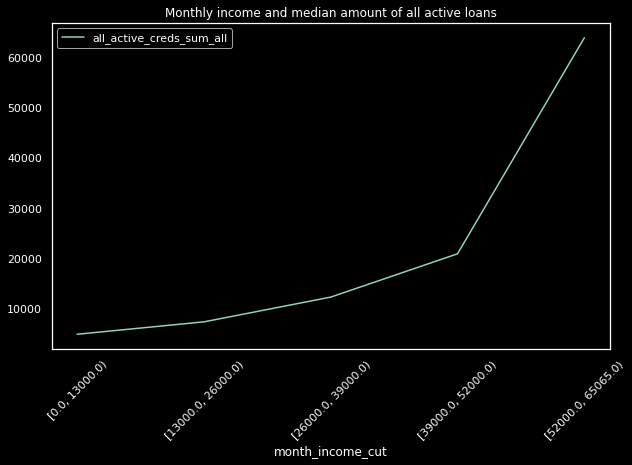

In [ ]:
all_active_creds_sum_cut.plot(x='month_income_cut',y='all_active_creds_sum_all',kind='line'
,figsize=(10,6),title='Monthly income and median amount of all active loans',rot=45,grid=False);

In [ ]:
df.groupby('month_income_cut').agg({'order_id':'count','delay_more_sum_all':'mean'})

,order_id,delay_more_sum_all
month_income_cut,,
"[0.0, 13000.0)",918,3.224401
"[13000.0, 26000.0)",3604,5.345727
"[26000.0, 39000.0)",8591,4.936329
"[39000.0, 52000.0)",7169,5.420561
"[52000.0, 65065.0)",2834,4.953776


In [ ]:
df.groupby('month_income_cut').agg({'order_id':'count','count_overdue_all_3lm':'count'})

,order_id,count_overdue_all_3lm
month_income_cut,,
"[0.0, 13000.0)",918,918
"[13000.0, 26000.0)",3604,3604
"[26000.0, 39000.0)",8591,8591
"[39000.0, 52000.0)",7169,7169
"[52000.0, 65065.0)",2834,2834


In [ ]:
df.groupby('month_income_cut').agg({'order_id':'count','cred_day_overdue_all_sum_all':'mean'})

,order_id,cred_day_overdue_all_sum_all
month_income_cut,,
"[0.0, 13000.0)",918,203.192810
"[13000.0, 26000.0)",3604,281.528302
"[26000.0, 39000.0)",8591,263.524037
"[39000.0, 52000.0)",7169,263.690752
"[52000.0, 65065.0)",2834,223.712068


In [ ]:
df.groupby('approved').agg({'mfo_last_days_all':'median'})

,mfo_last_days_all
approved,
0,342.0
1,14.0


In [ ]:
df['mfo_last_days_all'].agg(['min','mean','median','max']).to_frame().round(3)

,mfo_last_days_all
min,0.000
mean,2615.989
median,83.500
max,9999.000


In [ ]:
df['delay_all_cut'] = pd.qcut(df['delay_more_sum_all'],12,duplicates='drop')

In [ ]:
delay_all_cut = df.groupby(['delay_all_cut'],as_index =False).agg({'order_id':'count','approved':'mean','bad':'mean'})#  Количество просрочек более чем на 90 дней по всем кредитам отрицательное влияет на одобрение 

In [ ]:
delay_all_cut

,delay_all_cut,order_id,approved,bad
0,"(-0.001, 1.0]",14719,0.404104,0.271184
1,"(1.0, 2.0]",1009,0.189296,0.246073
2,"(2.0, 5.0]",2095,0.181384,0.250000
3,"(5.0, 9.0]",1627,0.154886,0.250000
4,"(9.0, 19.0]",1790,0.159218,0.315789
5,"(19.0, 171.0]",1876,0.113539,0.258216


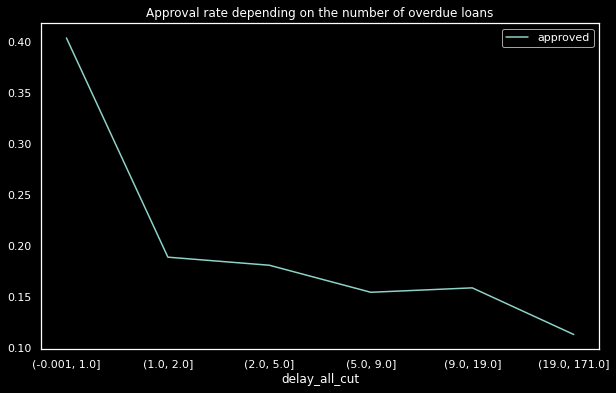

In [ ]:
delay_all_cut.plot(x='delay_all_cut',y='approved',title='Approval rate depending on the number of overdue loans',figsize=(10,6),kind='line',grid=False);

In [ ]:
df['bad'].value_counts(normalize=True)

0.0    0.729949
1.0    0.270051
Name: bad, dtype: float64

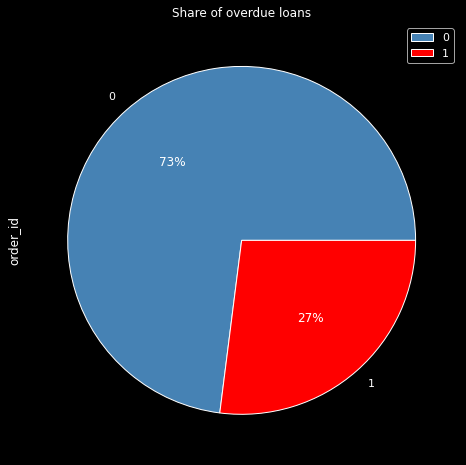

In [ ]:
df.groupby('bad',as_index=False).agg({'order_id':'count'})\
                                .plot(kind='pie',y='order_id',
                                      colors = ['steelblue','red'],
                                      autopct='%1.0f%%',title ='Share of overdue loans',
                                      figsize=(10,8));

## Model

In [ ]:
df.dtypes

order_id                           int64
cred_sum_cc_all                  float64
mfo_inqs_count_month               int64
all_closed_creds_sum_all           int64
bank_inqs_count_quarter            int64
cred_max_overdue_max_ly          float64
all_active_creds_sum_all           int64
mfo_last_days_all                  int64
cred_sum_cc_ly                   float64
cred_sum_debt_all_all            float64
all_closed_creds_sum_ly            int64
mfo_cred_mean_sum_3lm            float64
delay_more_sum_all                 int64
all_creds_count_all                int64
cred_day_overdue_all_sum_all       int64
cred_max_overdue_max_3lm         float64
mfo_closed_count_ly                int64
cred_sum_overdue_cc_all          float64
count_overdue_all_3lm              int64
all_creds_count_lm                 int64
work_code                          int64
month_income                       int64
region                             int64
bad                              float64
approved        

In [ ]:
train = df.sample(frac=0.7,random_state=42).copy()

In [ ]:
val = df[~df.index.isin(train.index)].copy()

In [ ]:
len(val)+len(train)==len(df)

True

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df.columns

Index(['order_id', 'cred_sum_cc_all', 'mfo_inqs_count_month',
       'all_closed_creds_sum_all', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'all_active_creds_sum_all',
       'mfo_last_days_all', 'cred_sum_cc_ly', 'cred_sum_debt_all_all',
       'all_closed_creds_sum_ly', 'mfo_cred_mean_sum_3lm',
       'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm', 'work_code',
       'month_income', 'region', 'bad', 'approved', 'cred_debt_cut',
       'all_creds_count_cut', 'delay_more_sum_cut', 'month_income_cut',
       'cred_day_overdue_cut', 'all_creds_cut', 'active_credsum_cut',
       'delay_all_cut'],
      dtype='object')

In [ ]:
X_col = ['cred_sum_cc_all', 'mfo_inqs_count_month',
       'all_closed_creds_sum_all', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'all_active_creds_sum_all',
       'mfo_last_days_all', 'cred_sum_cc_ly', 'cred_sum_debt_all_all',
       'all_closed_creds_sum_ly', 'mfo_cred_mean_sum_3lm',
       'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm',
       'month_income','region']
  

y_col = ['approved']

In [ ]:
model = CatBoostClassifier(verbose=100,
                           random_state=42,
                           learning_rate=0.5,
                           early_stopping_rounds=200,
                           eval_metric='AUC'
                           )

In [ ]:
model.fit(train[X_col],train[y_col],
          eval_set=(val[X_col],val[y_col]))

0:	test: 0.9180027	best: 0.9180027 (0)	total: 75.8ms	remaining: 1m 15s
100:	test: 0.9564394	best: 0.9603912 (32)	total: 1.28s	remaining: 11.4s
200:	test: 0.9541538	best: 0.9603912 (32)	total: 2.52s	remaining: 10s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9603911843
bestIteration = 32

Shrink model to first 33 iterations.


In [ ]:
fi = pd.DataFrame({'w':model.feature_importances_,'name':X_col})

In [ ]:
fi.sort_values('w',ascending=False) # Посмотрим  какие переменные оказывают наибольший эффект на наш таргет

,w,name
13,32.746610,cred_day_overdue_all_sum_all
12,12.557628,all_creds_count_all
8,10.045922,cred_sum_debt_all_all
11,5.850068,delay_more_sum_all
9,4.409282,all_closed_creds_sum_ly
3,4.221614,bank_inqs_count_quarter
2,4.132905,all_closed_creds_sum_all
16,3.323972,cred_sum_overdue_cc_all
5,2.885994,all_active_creds_sum_all
7,2.721687,cred_sum_cc_ly


In [ ]:
val['score'] = model.predict_proba(val[X_col])[:,1]

In [ ]:
val[['approved','score']]

,approved,score
1,0,0.004302
9,1,0.828310
11,0,0.019206
13,0,0.000039
16,0,0.001636
...,...,...
23099,0,0.066633
23105,0,0.021586
23106,0,0.008638
23113,0,0.000589


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
roc_auc_score(val['approved'],val['score'])

0.9603911842964582

In [ ]:
fpr, tpr, thr = roc_curve(val['approved'],val['score'])

In [ ]:
roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thr':thr})

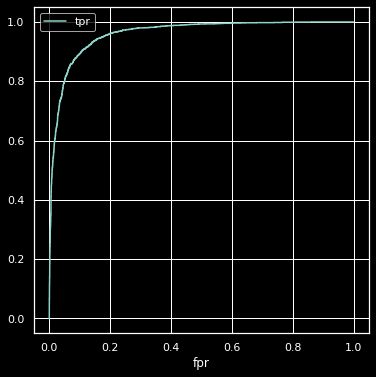

In [ ]:
roc.plot(x='fpr',y='tpr',figsize=(6,6),grid=True)

In [ ]:
roc['tpr-fpr'] = roc['tpr'] - roc['fpr'] # Найдем оптимальный treshold(т.е. максимальную разницу между профитом и потерями)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
roc.sort_values('tpr-fpr',ascending=False)

,fpr,tpr,thr,tpr-fpr
618,0.109,0.905,0.299,0.796
616,0.108,0.904,0.300,0.796
612,0.107,0.904,0.305,0.796
620,0.109,0.905,0.298,0.796
628,0.112,0.908,0.290,0.796
...,...,...,...,...
1158,0.994,1.000,0.000,0.006
3,0.000,0.006,0.997,0.006
1,0.000,0.000,0.999,0.000
0,0.000,0.000,1.999,0.000


In [ ]:
best_thr = roc.sort_values('tpr-fpr',ascending=False)['thr'].iloc[0]

In [ ]:
val['y_pred'] = (val['score'] >= best_thr)*1

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(val['approved'],val['y_pred']))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4726
           1       0.80      0.90      0.85      2209

    accuracy                           0.90      6935
   macro avg       0.87      0.90      0.88      6935
weighted avg       0.90      0.90      0.90      6935



In [ ]:
confusion_matrix(val['approved'],val['y_pred'])

array([[4212,  514],
       [ 210, 1999]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(val['approved'],val['y_pred']).ravel()

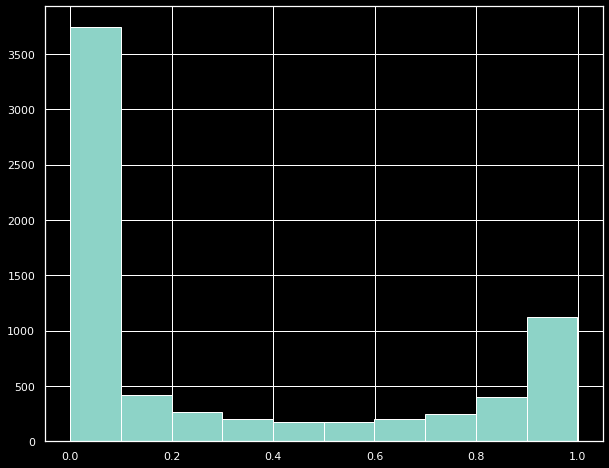

In [ ]:
val['score'].hist()

In [ ]:
tp

1999

In [ ]:
thrs = [0] + list(np.sort(val['score'].unique()))

In [ ]:
thr = thrs[123]

In [ ]:
val['pred'] = (val['score'] > thr) * 1

In [ ]:
tn, fp, fn, tp = confusion_matrix(val['approved'],val['pred']).ravel()

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
res = []
for thr in tqdm(thrs):
  val['pred'] = (val['score'] > thr) * 1
  tn, fp, fn, tp = confusion_matrix(val['approved'],val['pred']).ravel()
  res.append((tn, fp, fn, tp ,thr))


  0%|          | 0/6780 [00:00<?, ?it/s]

In [ ]:
cf = pd.DataFrame(res, columns=['tn', 'fp', 'fn', 'tp','thr'])

In [ ]:
cf['profit'] = cf['tn'] - 5 * cf['fn'] - cf['fp'] # Так как ошибку второго рода(false negative) допустить будет стоить дороже, 
                                                  # то добавим произвольного веса этому коэффициенту

In [ ]:
cf.sort_values('profit',ascending=False)

,tn,fp,fn,tp,thr,profit
4248,4196,530,203,2006,0.290,2651
4247,4195,531,203,2006,0.290,2649
4271,4212,514,210,1999,0.299,2648
4267,4209,517,209,2000,0.298,2647
4246,4194,532,203,2006,0.289,2647
...,...,...,...,...,...,...
6775,4726,0,2205,4,0.999,-6299
6776,4726,0,2206,3,0.999,-6304
6777,4726,0,2207,2,0.999,-6309
6778,4726,0,2208,1,0.999,-6314
